In [36]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import pandas as pd

# Load train and test data

Train features

In [15]:
x_ = np.load("./x_train.npz")
x_train = x_['arr_0']
x_train.shape

(891, 7)

Train targets

In [91]:
y_ = np.load("./y_train.npz")
y_train = y_['arr_0']
y_train.shape

(891,)

Test data

In [14]:
x__ = np.load("./x_test.npz")
x_test = x__['arr_0']

# Tree Ensamble

In [20]:
n = [10,50,100,500]
d = [2,4,8,16,32,64,None]
s = [2,10,30,50,100,200,300,700]

params = {'n_estimators':n,
          'max_depth': d,
          'min_samples_split': s}

model = RandomForestClassifier()
search = GridSearchCV(model, params)
search.fit(x_train, y_train)
sorted(search.cv_results_.keys())


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_min_samples_split',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

## Best model parameters

In [24]:
scores_min_samples_split = np.array(search.cv_results_['param_min_samples_split'])
scores_max_depth = np.array(search.cv_results_['param_max_depth'])
scores_n_estimators = np.array(search.cv_results_['param_n_estimators'])
mean_test_score =np.array(search.cv_results_['mean_test_score'])
rank_test_score =np.array(search.cv_results_['rank_test_score'])

index_best_params = np.where(rank_test_score == 1)

print(f"Best mean = {mean_test_score[index_best_params]} in parameters:")
print(f"scores_n_estimators = {scores_n_estimators[index_best_params]}")
print(f"scores_max_depth = {scores_max_depth[index_best_params]}")
print(f"scores_min_samples_split = {scores_min_samples_split[index_best_params]}")

Best mean = [0.83955809] in parameters:
scores_n_estimators = [50]
scores_max_depth = [None]
scores_min_samples_split = [10]


## Plotting parameters selection

Text(0.5, 0, 'min samples split')

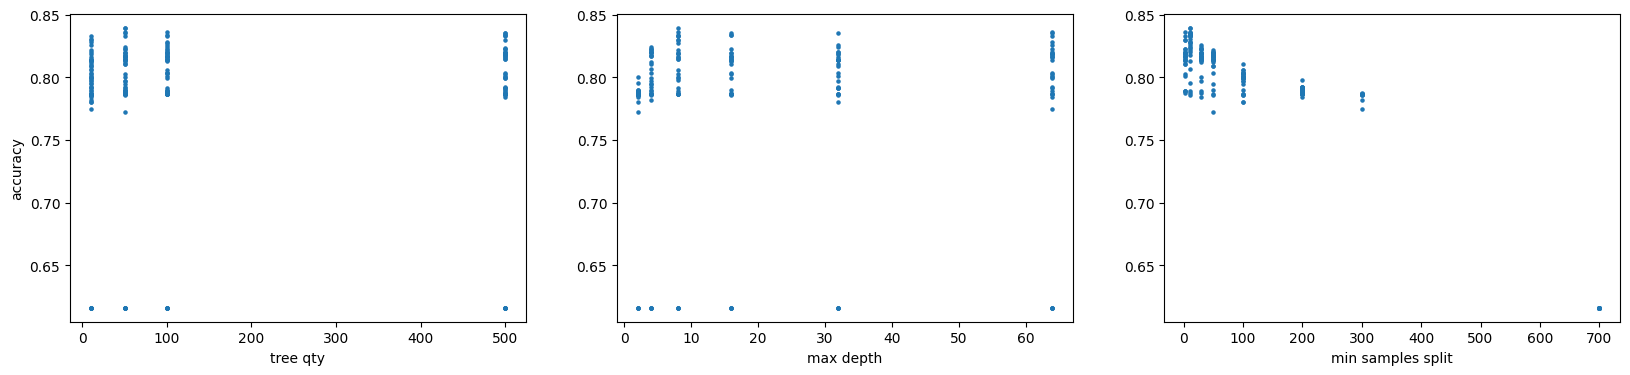

In [105]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(20,4))
ax[0].scatter(scores_n_estimators, mean_test_score, s = 5)
ax[0].set_xlabel('tree qty')
ax[0].set_ylabel('accuracy')
ax[1].scatter(scores_max_depth, mean_test_score, s = 5)
ax[1].set_xlabel('max depth')
ax[2].scatter(scores_min_samples_split, mean_test_score, s = 5)
ax[2].set_xlabel('min samples split')

# Prediction

In [106]:
best_model = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=50)
best_model.fit(x_train, y_train)

prediction = best_model.predict(x_test)

# Output

In [87]:
metadata = pd.read_csv("./raw_files/test.csv")
metadata = pd.DataFrame(metadata["PassengerId"])

prediction = pd.DataFrame(prediction.astype(int),columns=["Survived"])

result = pd.concat([metadata, prediction], axis=1, ignore_index=True)

In [90]:
result.to_csv("result.csv",sep=",", index=False, header = ["PassengerId", "Survived"])